# News Articles classification : Using Bag-of-words approach 

************************************************************************************************************************
**Project**      : News Articles Text Classification using Bag of Words Model
****
**Notebook Name**: AML-news-classification.ipynb    
****
**Developed by** : Kushal Kokje (kkokje@iu.edu) , 
               Udit   Patel (udipatel@iu.edu)
****               
**Date**         : 11-05-2016
****    
**History of changes :** 
<pre>

------------------------------------------------------------------------------------
|**Author**          |      **Date**      |  **Comments**                          |
|--------------------|--------------------|----------------------------------------|
|Kushal Kokje        |      11/05/2016    |   Initial Version                      |
|--------------------|--------------------|----------------------------------------|
| Udit Patel         |      12/7/2016     | Code correction and MDS implementation |
------------------------------------------------------------------------------------

</pre>

************************************************************************************************************************

## 1> Dataset Loading 
****


Dataset used for classification is BBC news dataset.
It Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Natural Classes: 5 (business, entertainment, politics, sport, tech)

Courtsey : 
- D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.
All rights, including copyright, in the content of the original articles are owned by the BBC.

Data files needs to arranged in a folder as per their class values.
The bbc folder used here contains 5 sub folders , which are the 5 class values , each containing files for that category.  



In [1]:
# Import libraries need for loading the dataset into the Pyhton datasets class object

import sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np

In [185]:
# set dataset file path
bbcfilespath     = "C:\\Users\\Kushal Kokje\\Documents\\bbc"

# dataset.load_files loads all the files in bbcdataset object.
bbcdataset = datasets.load_files(bbcfilespath,encoding = 'utf-8',decode_error = 'ignore')

In [184]:
# print number of files loaded in the dataset
print(len(bbcdataset.filenames))
# the data attribute hold the actual parsed text files as strings. It is a list of strings.
print(len(bbcdataset.data))
print(type(bbcdataset.data))

272
272
<class 'list'>


In [17]:
# print the target names(class values) , which are the names of the sub folder 
bbcdataset.target_names

['business', 'entertainment', 'politics', 'sport', 'tech']

In [18]:
# print first line of the first file loaded
print("\n".join(bbcdataset.data[0].split("\n")[:3]))

Tate & Lyle boss bags top award

Tate & Lyle's chief executive has been named European Businessman of the Year by a leading business magazine.


In [20]:
# let print the target/class value of this file
print(bbcdataset.target[0])

# It prints 0 which is the index of the value "business" in bbcdataset.target_names attribute. 

0


In [24]:
print(bbcdataset.target_names[bbcdataset.target[0]])

business


In [25]:
# print first 10 target values
bbcdataset.target[:10]

array([0, 4, 2, 3, 2, 2, 2, 4, 2, 3])

In [26]:
# Printing target value names for first 10 files
for t in bbcdataset.target[:10]:
    print(bbcdataset.target_names[t])

business
tech
politics
sport
politics
politics
politics
tech
politics
sport


## 2> Feature Extraction 
****
This implemnetaion uses CountVectorizer class from the sklearn library to create a document-term matrix which is a high 
dimensional sparse matrix.Each text file is a row and columns are distinct words contained in all the text files combined. The 
matrix hold the count values for each word in the text file.Since most of the rows will have 0 values , the matrix is a sparse 
matrix which cannot be held in systems RAM and hence CountVectorizer  uses scipy.sparse which creates a sparse matrix.

In [7]:
# The vectorized_data object created stores the data and target attribute along with other attributes like filename, 
# target_names etc
CountVect = CountVectorizer()
Vectorized_data = CountVect.fit_transform(bbcdataset.data)

In [29]:
# printing the shape of the sparse matrix Vectorized_data. It contains 2225 rows (total files) and 29421 (distinct words) columns.
Vectorized_data.shape

(2225, 29421)

In [41]:
# It is also possible to get a column index for a particualr word . Let say the word is ""award""
CountVect.vocabulary_.get(u'award')

3210

## 3.> TF - IDF Transformation 
****

To downscale the words that are used in many documents and hence are less informative , we use another transformation method 
called TR-IDF transformation.
Refer <html>https://en.wikipedia.org/wiki/Tf%E2%80%93idf</html> for more info
    

In [43]:
# use the TfidfTransformer class to perform the transformation 
tf = TfidfTransformer(use_idf=False).fit(Vectorized_data)
Vectorized_data_tf = tf.transform(Vectorized_data) 


In [44]:
# print the shape of the tf idf transformed matrix
print(Vectorized_data_tf.shape)

(2225, 29421)


In [171]:
# vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
#                                  stop_words='english')
# X_words = vectorizer.fit_transform(bbcdataset.data)

In [45]:
# Split the matrix into 80 - 20 % for traning on 80% data and testing on 20 %.
# Use the train_test_split to split the data. parameter test_size = 0.2 makes sure its 80-20 % split

X_train, X_test, y_train, y_test = train_test_split(Vectorized_data_tf, bbcdataset.target, test_size=0.2, random_state=0)

In [46]:
# Size of the new matrices created
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1780, 29421)
(1780,)
(445, 29421)
(445,)


In [47]:
# get the class distribution of the training data
from collections import Counter
Counter(y_train)

Counter({0: 408, 1: 302, 2: 339, 3: 408, 4: 323})

In [48]:
# get the class distribution of the test class
Counter(y_test)

Counter({0: 102, 1: 84, 2: 78, 3: 103, 4: 78})

## 4.> Training a Classifier 
****

+ Training data  : X_train

+ Training Label : y_train

+ Test data      : X_train

+ Test Label     : y_train

    
Initially we'll be building a base mode by using following set of classifiers and then further exploit Naive Bayes 
and Support Vector machine as experimental suggest that NB and SVM works well with text classification process.
SVM works great for sparse high dimensional data.

+ Decision Trees

+ Naive Bayes

+ Logistic Regression

+ Support Vector Machines

+ Ensemble : Random Forrest

+ Ensemble : Adaboost

+ Gradient Boosting

+ K- means clustering



In [50]:
# import the module from sklearn
from sklearn import tree


In [54]:
# Fit the classifier on the training set
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train,y_train)

In [55]:
# Get predictions on the test set
tree_predict = tree_clf.predict(X_test) 

In [56]:
# calculate Accuracy
np.mean(y_test == tree_predict)

0.79325842696629212

In [57]:
# peroform 10 fold cross validation to get the average performance of the classifier
from sklearn.model_selection import cross_val_score

In [58]:
cross_val_score(tree_clf, X_train, y_train, cv=10)

array([ 0.78333333,  0.80555556,  0.84357542,  0.81460674,  0.79213483,
        0.79213483,  0.79775281,  0.83707865,  0.82954545,  0.76      ])

In [59]:
# logistic regression 

from sklearn.linear_model import LogisticRegression

In [60]:
LR_clf = LogisticRegression()
_ = LR_clf.fit(X_train,y_train)

In [61]:
LR_predict = LR_clf.predict(X_test)

In [62]:
np.mean(LR_predict== y_test)

0.92808988764044942

In [63]:
cross_val_score(LR_clf, X_train, y_train, cv=10)


array([ 0.91666667,  0.93888889,  0.94972067,  0.86516854,  0.92134831,
        0.91573034,  0.92696629,  0.93258427,  0.91477273,  0.91428571])

In [64]:
# Using Bagging approach , random forrest classfier
from sklearn.ensemble import RandomForestClassifier

In [65]:
randomforrest_clf = RandomForestClassifier()
_ = randomforrest_clf.fit(X_train,y_train)

In [66]:
randomforrest_predict = randomforrest_clf.predict(X_test)

In [67]:
np.mean(randomforrest_predict == y_test)

0.86741573033707864

In [68]:
cross_val_score(randomforrest_clf, X_train, y_train, cv=10)

array([ 0.85555556,  0.86666667,  0.86592179,  0.91573034,  0.93258427,
        0.90449438,  0.91011236,  0.87640449,  0.85795455,  0.82285714])

In [69]:
# incresing the number of trees to 100 from default 10
randomforrest_clf = RandomForestClassifier(n_estimators = 100)
_ = randomforrest_clf.fit(X_train,y_train)
randomforrest_predict = randomforrest_clf.predict(X_test)
np.mean(randomforrest_predict == y_test)

0.95056179775280902

In [70]:
# using Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [71]:
adaboost_clf = AdaBoostClassifier(n_estimators = 500)
_ = adaboost_clf.fit(X_train,y_train)

In [72]:
adaboost_predict = adaboost_clf.predict(X_test)

In [73]:
np.mean(adaboost_predict == y_test)

0.86292134831460676

In [74]:
# with n_estimators  = 100 acuracy is just 80 

In [75]:
# using gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gb_clf = GradientBoostingClassifier(n_estimators = 100)
_ = gb_clf.fit(X_train,y_train)

In [80]:
gb_predict = gb_clf.predict(X_test.toarray())

In [81]:
np.mean(gb_predict == y_test)

0.95280898876404496

In [82]:
# Training Naive Bayes Classifier
nb_clf = MultinomialNB().fit(X_train,y_train)


In [83]:
nb_predict = nb_clf.predict(X_test)

In [84]:
np.mean(nb_predict == y_test)        

0.84269662921348309

In [85]:
# furher exploiting Naive Bayes
from sklearn import metrics

In [86]:
print(metrics.classification_report(y_test, nb_predict,
...     target_names=bbcdataset.target_names))

               precision    recall  f1-score   support

     business       0.77      0.98      0.86       102
entertainment       0.97      0.44      0.61        84
     politics       0.99      0.86      0.92        78
        sport       0.74      1.00      0.85       103
         tech       0.97      0.87      0.92        78

  avg / total       0.87      0.84      0.83       445



In [87]:
metrics.confusion_matrix(y_test, nb_predict)

array([[100,   0,   0,   1,   1],
       [ 17,  37,   0,  29,   1],
       [  7,   0,  67,   4,   0],
       [  0,   0,   0, 103,   0],
       [  6,   1,   1,   2,  68]])

In [90]:
cross_val_score(nb_clf,X_train,y_train,cv = 10)

array([ 0.81111111,  0.83888889,  0.82681564,  0.79213483,  0.84831461,
        0.81460674,  0.84831461,  0.80337079,  0.80681818,  0.76571429])

In [91]:
scores = cross_val_score(nb_clf,X_train,y_train,cv = 10)

In [92]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.05)


In [93]:
# Tweaking the value of parameter alpha we can achieve greater acuracy , but the model might be prone to overfitting
alpha_values = [1,0.8,0.5,0.1]
score_values = []
for alpha in alpha_values:
    nb_classifier = MultinomialNB(alpha = alpha)
    scores = cross_val_score(nb_classifier,X_train,y_train,cv = 10)
    score_values.append(scores.mean())

In [94]:
for alpha_val,score_val in zip(alpha_values,score_values):
#     score_val = round(score_val*100,2)
    print("Mean score for alpha : %0.2f  =  %0.2f %% " %(alpha_val ,score_val*100))

    
# as seen the accuracy increases as the value of alpha keeps decresing , But the it is more prone to overfitting .

Mean score for alpha : 1.00  =  81.56 % 
Mean score for alpha : 0.80  =  83.13 % 
Mean score for alpha : 0.50  =  87.63 % 
Mean score for alpha : 0.10  =  96.12 % 


In [95]:
score_list = ['accuracy','f1_macro','precision_macro','recall_macro']
             
score_values = []
for score_val in score_list:
    nb_classifier = MultinomialNB(alpha = 0.5)
    scores = cross_val_score(nb_classifier,X_train,y_train,cv = 10,scoring = score_val)
    score_values.append(scores.mean())

In [96]:
for score_param,accuracy in zip(score_list,score_values):
    print("Mean score using scoring parameter %s  =  %0.2f %% " %(score_param ,accuracy*100))

Mean score using scoring parameter accuracy  =  87.63 % 
Mean score using scoring parameter f1_macro  =  86.37 % 
Mean score using scoring parameter precision_macro  =  90.73 % 
Mean score using scoring parameter recall_macro  =  85.93 % 


In [ ]:
# since the data set is balanced for the target class , the accuracy and f1_macro scores are almost same

In [98]:
# using SVM classifier with SGD training
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [99]:
from sklearn import linear_model


In [100]:
svm_clf = linear_model.SGDClassifier(loss='hinge', penalty='l2',
...                                            alpha=1e-3, n_iter=5, random_state=42)

In [105]:
# _ = svm_clf.fit(X_train,y_train)
_ = svm_clf.fit(X_train,y_train)


In [106]:
svm_predict = svm_clf.predict(X_test)

In [107]:
np.mean(y_test == svm_predict)  

0.9550561797752809

In [108]:
print(metrics.classification_report(y_test, svm_predict,
...     target_names=bbcdataset.target_names))

               precision    recall  f1-score   support

     business       0.95      0.92      0.94       102
entertainment       0.99      0.92      0.95        84
     politics       0.92      0.99      0.95        78
        sport       0.99      0.98      0.99       103
         tech       0.93      0.97      0.95        78

  avg / total       0.96      0.96      0.96       445



In [109]:
metrics.confusion_matrix(y_test, svm_predict)

array([[ 94,   0,   5,   0,   3],
       [  3,  77,   2,   0,   2],
       [  0,   0,  77,   1,   0],
       [  1,   0,   0, 101,   1],
       [  1,   1,   0,   0,  76]])

In [110]:
# performing Grid search for tuning the parameters
from sklearn.model_selection import GridSearchCV

In [111]:
# input gird of set of parameters
parameters = {'alpha': (0.00001, 0.000001,0.0001 ),'penalty': ('l2', 'elasticnet'),'n_iter': (10, 50, 80)}

In [112]:
gs_svm_clf = GridSearchCV(svm_clf, parameters, n_jobs=-1)

In [113]:
gs_svm_clf = gs_svm_clf.fit(X_train, y_train)

In [114]:
type(gs_svm_clf)

sklearn.model_selection._search.GridSearchCV

In [115]:
# getting the best parameters
gs_svm_clf.best_params_

{'alpha': 1e-05, 'n_iter': 10, 'penalty': 'elasticnet'}

In [118]:
gs_svm_predict = gs_svm_clf.predict(X_test)

In [119]:
np.mean(y_test == gs_svm_predict)

0.9662921348314607

In [120]:
gs_svm_clf.best_score_ 

0.97022471910112362

In [122]:
# Entire result set of the Grid search approach. By deafut it uses 3-fold cross validation
gs_svm_clf.cv_results_

{'mean_fit_time': array([ 0.08247431,  0.23329107,  0.51219551,  2.00031837,  0.71991396,
         3.2230703 ,  0.29411554,  0.59307718,  0.51904766,  2.02622128,
         0.72776834,  3.15656026,  0.30681578,  0.55380599,  0.55564396,
         2.08771801,  0.82369002,  1.87966474]),
 'mean_score_time': array([ 0.        ,  0.00350897,  0.0040106 ,  0.00401115,  0.00367626,
         0.00367641,  0.00367641,  0.00350912,  0.00401028,  0.01570916,
         0.00367649,  0.0035092 ,  0.00384363,  0.00350928,  0.00367641,
         0.00350976,  0.00350936,  0.00267394]),
 'mean_test_score': array([ 0.96629213,  0.97022472,  0.96741573,  0.96685393,  0.96629213,
         0.96685393,  0.96404494,  0.96179775,  0.96404494,  0.95674157,
         0.96629213,  0.96235955,  0.96292135,  0.96741573,  0.96910112,
         0.96910112,  0.96853933,  0.96910112]),
 'mean_train_score': array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  

In [124]:
from sklearn import svm

In [125]:
parameters  = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
 ]

svr = svm.SVC()
svm_classifier = GridSearchCV(svr, parameters,n_jobs=-1,cv = 5)

In [126]:
svm_classifier = svm_classifier.fit(X_train,y_train)

In [128]:
 svm_classifier.best_score_ 

0.96741573033707862

In [129]:
svm_best_predict = svm_classifier.predict(X_test)

In [130]:
np.mean(y_test == svm_best_predict)

0.96404494382022476

## 6.> K - means clustering
****



In [137]:
# K means for bbc dataset
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans,MiniBatchKMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics





In [138]:
# bbcfilespath =  "C:\\Users\\Kushal Kokje\\Documents\\bbc"
bbcfilespath = "C:\\Users\\Kushal Kokje\\Documents\\bbc-kmeans"


In [139]:
bbcdataset = datasets.load_files(bbcfilespath,encoding = 'utf-8',decode_error = 'ignore')

In [140]:
len(bbcdataset.data)

272

In [141]:
labels = bbcdataset.target
true_k = np.unique(labels).shape[0]
true_k




5

In [142]:
hasher = HashingVectorizer(stop_words='english',
                           lowercase=True,non_negative=False, norm='l2',binary=False)
vectorizer = make_pipeline(hasher, TfidfTransformer())



In [143]:
X = vectorizer.fit_transform(bbcdataset.data)
# X = vectorizer.fit_transform(X_test)

In [144]:
X.shape # y_test is the target

(272, 1048576)

In [145]:
km = KMeans(n_clusters=true_k,n_jobs=-1)#, init='k-means++', max_iter=100, n_init=1,verbose=5,n_jobs=-1)

In [146]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [147]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))

Homogeneity: 0.518


In [148]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.518
Completeness: 0.557
V-measure: 0.536
Adjusted Rand-Index: 0.393
Silhouette Coefficient: 0.016


In [149]:
clusters = km.labels_.tolist()

In [150]:
bbcdataset.target[0]

4

In [151]:
print(km.labels_[:10])

[1 1 4 2 1 4 0 4 4 1]


In [152]:
print(bbcdataset.target[:10])

[4 4 3 2 4 3 1 3 1 4]


In [153]:
cnt = [ a for a, b in zip(list(km.labels_),list(bbcdataset.target)) if a != b ] 
    

In [154]:
list(km.labels_[:10])

[1, 1, 4, 2, 1, 4, 0, 4, 4, 1]

In [155]:
len(cnt)

201

Save the model for later using joblib.dump

In [156]:
from sklearn.externals import joblib

In [157]:
joblib.dump(km,  'doc_cluster.pkl')

['doc_cluster.pkl']

In [158]:
km = joblib.load('doc_cluster.pkl')

In [159]:
clusters = km.labels_.tolist()

In [160]:
filenames = bbcdataset.filenames


In [161]:
titles = []
# titles = X_

for title in filenames:
    t = title.split("\\")[-2:]
    s = "".join(t)
    titles.append(s)

In [163]:
filedata = bbcdataset.data

In [165]:
import pandas as pd

In [166]:
films = { 'title': titles, 'textdata': filedata, 'cluster': clusters }

frame = pd.DataFrame(films, index = [clusters] , columns = ['title', 'cluster'])

In [167]:
# Frequency of the file count in each cluster after k means
frame['cluster'].value_counts() 

2    93
1    67
4    54
0    40
3    18
Name: cluster, dtype: int64

In [170]:
class_target = pd.Series(bbcdataset.target)

In [171]:
# Frequency of the file count in original dataset
class_target.value_counts()

3    58
1    58
4    55
2    52
0    49
dtype: int64

In [172]:
b = pd.Series(clusters)

In [173]:
b.value_counts()

2    93
1    67
4    54
0    40
3    18
dtype: int64

In [110]:
# order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

In [ ]:
# for i in range(5):
#     print("Cluster %d words:" % i, end='')
    
#     for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
#         print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
#     print() #add whitespace
#     print() #add whitespace
    
#     print("Cluster %d titles:" % i, end='')
#     for title in frame.ix[i]['title'].values.tolist():
#         print(' %s,' % title, end='')
#     print() #add whitespace
#     print() #add whitespace

## 7.> Multi Dimensional Scaling
****


In [175]:
# MDS using Cosine similiraity as a distance measure

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

In [176]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

In [177]:
MDS()

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=None, verbose=0)

In [178]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

In [179]:
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

In [180]:
xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [181]:

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Business', 
                 1: 'Politics', 
                 2: 'Tech', 
                 3: 'Entertainment', 
                 4: 'Sports'}

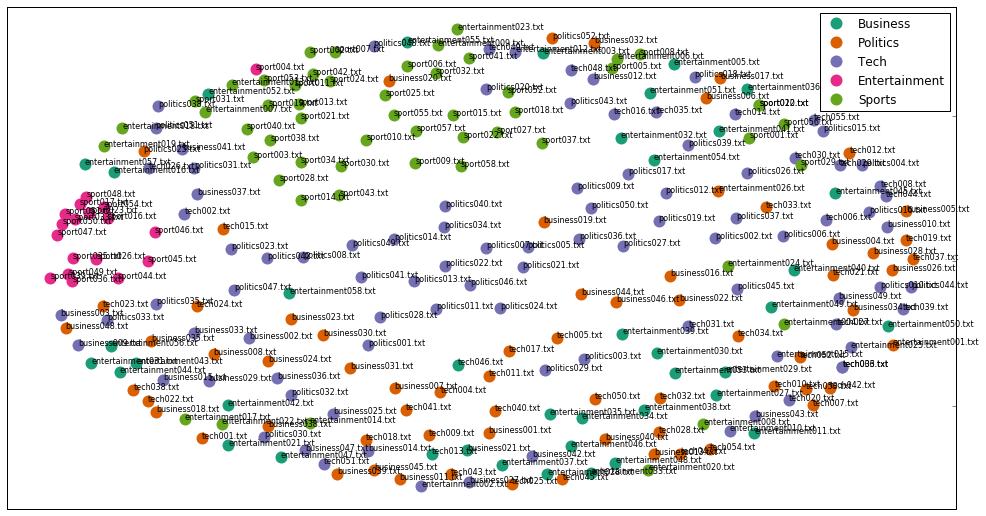

In [182]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

## 7.> Agglomorative clustering : WARD ALGORITHM along with Dendrogram
****





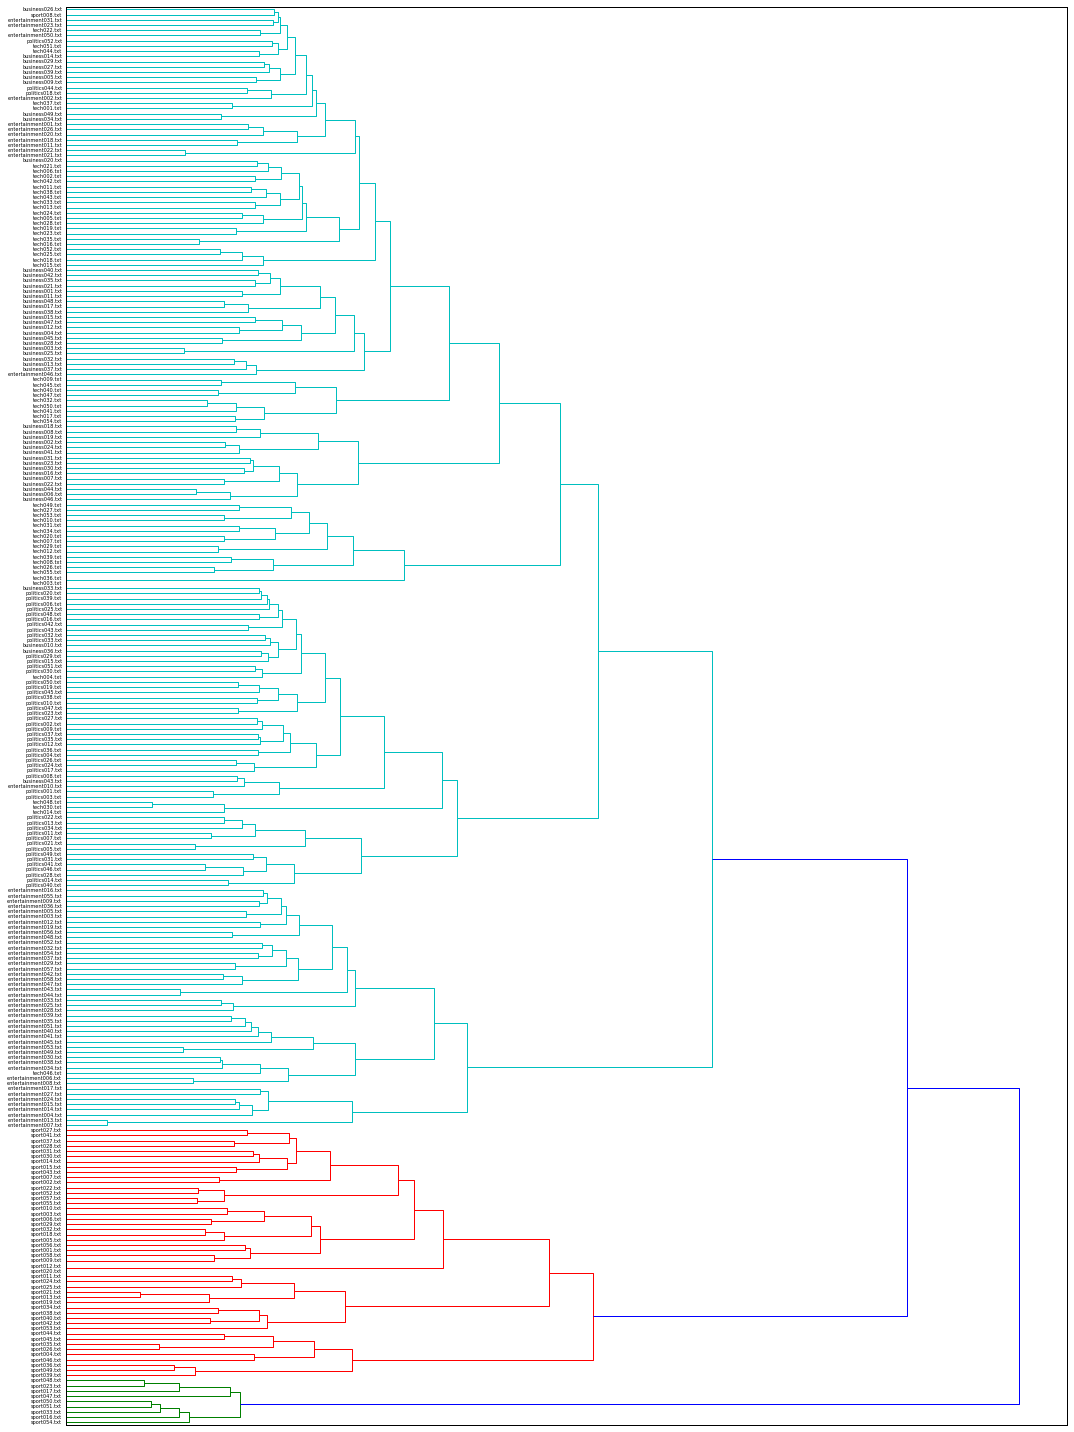

In [183]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=400) #save figure as ward_clusters